# Statistics on Indian Settlement and Payment Systems

We are going to perform analysis on the data released by RBI on daily basis regarding the Payments Systems in India.

#### Importing packages 

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Loadind the dataset 

In [4]:
df_0 = pd.read_excel("PSDDP04062020.xlsx",sheet_name = "March 2024")

In [5]:
df_0.head(10)

,Data for the day,"Payment and Settlement Systems – Daily Data Publication (updated as on March 29, 2024)",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,NaN,(Volume in lakhs; Value in INR Crores),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,PAYMENT TRANSACTIONS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,RBI Operated,NaN,NaN,NaN,NPCI Operated,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,RTGS,NaN,NEFT,NaN,AePS,NaN,UPI,NaN,IMPS,...,NaN,Rupee Derivatives (for all deals matched durin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Vol,Val,Vol,Val,Vol,Val,Vol,Val,Vol,...,Val,Vol,Val,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2024-03-01 00:00:00,9.8509,871473.836606,398.98345,190054.75732,0.53,14.04,4546.29,80825.87,215.71,...,321534.53,0.00644,36739.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2024-03-02 00:00:00,7.86605,244147.335071,239.26469,97846.48255,0.53,13.99,4520.81,75429.57,206.54,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2024-03-03 00:00:00,1.08304,11219.010782,149.5655,23370.246047,0.48,11.51,4338.82,58334.6,180.28,...,h,h,h,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024-03-04 00:00:00,10.72087,620553.294344,273.85983,151007.514658,0.58,14.48,4400.41,77261.65,208.6,...,318984.81,0.00413,22476.764,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Upon visual inspection of the dataframe we can see that there are empty rows of data where header is not present in proper format. We will be dropping these rows so that we can just get the rows with data 

In [6]:
# checking the existing hearder row
df_0.columns

# dropping the reader row till get the actual data 
df_1 = df_0.iloc[6:34,:43]

In [7]:
# Resetting the dataframe index 
df_1 = df_1.reset_index(drop=True)

In [8]:
# checking the updated df_1
df_1.head()

,Data for the day,"Payment and Settlement Systems – Daily Data Publication (updated as on March 29, 2024)",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42
0,2024-03-01 00:00:00,9.8509,871473.836606,398.98345,190054.75732,0.53,14.04,4546.29,80825.87,215.71,...,121.55,5660.87,52.29,1470.78,0.05728,728452.022,0.094455,321534.53,0.00644,36739.3
1,2024-03-02 00:00:00,7.86605,244147.335071,239.26469,97846.48255,0.53,13.99,4520.81,75429.57,206.54,...,120.42,5613.25,46.93,1277.9,0.00149,11629.89,0,0,0,0
2,2024-03-03 00:00:00,1.08304,11219.010782,149.5655,23370.246047,0.48,11.51,4338.82,58334.6,180.28,...,110.76,4657.42,36.46,932.68,h,h,h,h,h,h
3,2024-03-04 00:00:00,10.72087,620553.294344,273.85983,151007.514658,0.58,14.48,4400.41,77261.65,208.6,...,115.34,5255.65,45.8,1250.03,0.06494,740243.046,0.103915,318984.81,0.00413,22476.764
4,2024-03-05 00:00:00,10.15493,635211.107966,306.01976,147447.534958,0.58,15.97,4469.35,76244.86,202.85,...,113.37,5137.03,37.8,977.64,0.05805,699900.349577,0.11962,332791.06,0.0035,26470.925


In [9]:
Column = []
Column_0 = ["RTGS","NEFT","AEPS","UPI","IMPS","NACH CREDIT","NACH DEBIT","NETC","BBPS","CTS","CREDIT CARD POS",
          "CREDIT CARD E-COM","DEBIT CARD POS","DEBIT CARD E-COM","PREPAID PAYMENT INSTRUMENTS CARD POS",
          "PREPAID INSTRUMENT CARD ECOM","NFS ATMS","AEPS MICRO ATM/BC","GOVERNMENT SECURITIES CLEARING",
          "FOREX CLEARING","RUPEE DERIVATIES"]
Column_1 = ["VOL","VAL"]

In [10]:
for i in Column_0:
    for j in Column_1:
        c = i+ " " + j
        Column.append(c)

In [11]:
Column.insert(0,"DATE")

In [12]:
print(len(Column))

43


In [13]:
df_1.columns = Column

In [14]:
df_1.columns

Index(['DATE', 'RTGS VOL', 'RTGS VAL', 'NEFT VOL', 'NEFT VAL', 'AEPS VOL',
       'AEPS VAL', 'UPI VOL', 'UPI VAL', 'IMPS VOL', 'IMPS VAL',
       'NACH CREDIT VOL', 'NACH CREDIT VAL', 'NACH DEBIT VOL',
       'NACH DEBIT VAL', 'NETC VOL', 'NETC VAL', 'BBPS VOL', 'BBPS VAL',
       'CTS VOL', 'CTS VAL', 'CREDIT CARD POS VOL', 'CREDIT CARD POS VAL',
       'CREDIT CARD E-COM VOL', 'CREDIT CARD E-COM VAL', 'DEBIT CARD POS VOL',
       'DEBIT CARD POS VAL', 'DEBIT CARD E-COM VOL', 'DEBIT CARD E-COM VAL',
       'PREPAID PAYMENT INSTRUMENTS CARD POS VOL',
       'PREPAID PAYMENT INSTRUMENTS CARD POS VAL',
       'PREPAID INSTRUMENT CARD ECOM VOL', 'PREPAID INSTRUMENT CARD ECOM VAL',
       'NFS ATMS VOL', 'NFS ATMS VAL', 'AEPS MICRO ATM/BC VOL',
       'AEPS MICRO ATM/BC VAL', 'GOVERNMENT SECURITIES CLEARING VOL',
       'GOVERNMENT SECURITIES CLEARING VAL', 'FOREX CLEARING VOL',
       'FOREX CLEARING VAL', 'RUPEE DERIVATIES VOL', 'RUPEE DERIVATIES VAL'],
      dtype='object')

In [15]:
pd.set_option("display.max_columns",42)

In [70]:
df_1

,DATE,RTGS VOL,RTGS VAL,NEFT VOL,NEFT VAL,AEPS VOL,AEPS VAL,UPI VOL,UPI VAL,IMPS VOL,IMPS VAL,NACH CREDIT VOL,NACH CREDIT VAL,NACH DEBIT VOL,NACH DEBIT VAL,NETC VOL,NETC VAL,BBPS VOL,BBPS VAL,CTS VOL,CTS VAL,...,CREDIT CARD POS VAL,CREDIT CARD E-COM VOL,CREDIT CARD E-COM VAL,DEBIT CARD POS VOL,DEBIT CARD POS VAL,DEBIT CARD E-COM VOL,DEBIT CARD E-COM VAL,PREPAID PAYMENT INSTRUMENTS CARD POS VOL,PREPAID PAYMENT INSTRUMENTS CARD POS VAL,PREPAID INSTRUMENT CARD ECOM VOL,PREPAID INSTRUMENT CARD ECOM VAL,NFS ATMS VOL,NFS ATMS VAL,AEPS MICRO ATM/BC VOL,AEPS MICRO ATM/BC VAL,GOVERNMENT SECURITIES CLEARING VOL,GOVERNMENT SECURITIES CLEARING VAL,FOREX CLEARING VOL,FOREX CLEARING VAL,RUPEE DERIVATIES VOL,RUPEE DERIVATIES VAL
0,2024-03-01,9.85090,8.714738e+05,398.98345,190054.757320,0.53000,14.04,4546.29,80825.87,215.71,26374.21,295.22,10763.78,41.65,5257.79,113.22,209.89,48.38,1115.61,20.62,26535.31,...,1467.879424,48.95030,4170.897765,32.61221,804.680657,17.33234,641.146262,0.87165,19.802640,1.11583,51.358925,121.55,5660.87,52.29,1470.78,0.05728,728452.022000,0.094455,321534.53,0.00644,36739.300
1,2024-03-02,7.86605,2.441473e+05,239.26469,97846.482550,0.53000,13.99,4520.81,75429.57,206.54,22915.34,126.58,6129.92,129.03,8551.65,116.12,202.20,46.60,1061.76,19.89,23558.35,...,1236.455325,34.01803,2522.756809,30.01606,751.980793,12.54620,433.808286,0.98883,23.168794,1.21847,59.714516,120.42,5613.25,46.93,1277.90,0.00149,11629.890000,0.000000,0.00,0.00000,0.000
2,2024-03-03,1.08304,1.121901e+04,149.56550,23370.246047,0.48000,11.51,4338.82,58334.60,180.28,14994.60,23.68,481.43,107.52,6392.34,116.55,199.22,40.81,781.90,0.00,0.00,...,1211.059551,34.58376,2115.965724,29.21971,688.095805,11.74990,349.855468,0.98782,18.569260,1.02776,44.660743,110.76,4657.42,36.46,932.68,0.00000,0.000000,0.000000,0.00,0.00000,0.000
3,2024-03-04,10.72087,6.205533e+05,273.85983,151007.514658,0.58000,14.48,4400.41,77261.65,208.60,24990.56,121.25,4947.60,78.34,6476.10,106.56,181.05,52.38,1209.87,24.58,26349.30,...,2323.532879,66.25362,5442.939070,44.89128,1133.776434,21.85631,771.494704,0.97401,20.710294,1.16471,49.117725,115.34,5255.65,45.80,1250.03,0.06494,740243.046000,0.103915,318984.81,0.00413,22476.764
4,2024-03-05,10.15493,6.352111e+05,306.01976,147447.534958,0.58000,15.97,4469.35,76244.86,202.85,23826.76,144.44,7502.77,241.60,25437.47,108.92,189.49,57.17,1462.14,25.35,28501.76,...,1336.940756,44.14883,3832.210542,30.32972,740.238691,15.24898,555.547532,0.84967,18.581867,1.37995,67.049327,113.37,5137.03,37.80,977.64,0.05805,699900.349577,0.119620,332791.06,0.00350,26470.925
5,2024-03-06,10.34769,7.631523e+05,297.69323,147405.533089,0.65000,18.13,4418.26,73298.76,197.87,23302.39,389.81,9020.39,34.71,4665.45,111.26,194.11,51.28,1261.77,23.28,25734.85,...,1620.340651,43.39601,3711.131034,33.69967,822.929940,15.01395,556.233723,0.94875,20.641143,1.23539,56.580324,115.61,5162.29,36.37,934.83,0.05884,691783.867786,0.107425,309174.47,0.00176,8956.890
6,2024-03-07,11.27931,8.735678e+05,363.44540,205630.900066,0.72000,19.64,4501.15,72473.42,196.62,23201.29,134.20,6604.75,84.34,9282.39,114.09,197.36,51.16,1264.65,23.01,26966.46,...,1556.242642,33.67361,2915.275097,33.15297,808.694609,13.94477,485.639769,0.92526,20.850261,1.13374,53.640094,121.38,5421.83,38.87,991.54,0.06298,771072.739577,0.089655,290432.08,0.00347,23644.240
7,2024-03-08,4.47552,1.401864e+05,222.32483,79827.953965,0.74000,20.74,4282.33,59151.00,178.31,17728.41,89.05,3421.58,37.68,3465.79,110.63,197.70,45.18,1036.79,6.59,6890.78,...,1087.507498,40.41998,2895.335961,26.09247,638.529137,12.27950,416.050493,0.83836,18.799466,1.20755,49.149713,113.64,4913.08,34.29,864.86,0.00000,0.000000,0.000000,0.00,0.00000,0.000
8,2024-03-09,2.51695,2.579326e+04,161.60764,32346.047599,0.73000,21.77,4335.56,62712.98,182.12,17892.70,100.25,1427.90,29.51,1675.04,114.35,197.15,45.03,1015.48,0.00,0.00,...,1280.731563,33.84402,2235.221346,29.83830,738.980136,11.42889,341.414801,0.99989,21.290314,0.92381,30.738589,112.70,5028.99,3

### Data Cleaning 

We have '0' and 'h' as data observation for the dataset. As we are performing a statistical analysis and '0' we genuie observation of those dates as no transsaction took place on such dates. 
Hence we will be keeping those data observation with '0' but 'h' will be replace with '0'

In [156]:
df_1.isnull().sum()

DATE                                        0
RTGS VOL                                    0
RTGS VAL                                    0
NEFT VOL                                    0
NEFT VAL                                    0
AEPS VOL                                    0
AEPS VAL                                    0
UPI VOL                                     0
UPI VAL                                     0
IMPS VOL                                    0
IMPS VAL                                    0
NACH CREDIT VOL                             0
NACH CREDIT VAL                             0
NACH DEBIT VOL                              0
NACH DEBIT VAL                              0
NETC VOL                                    0
NETC VAL                                    0
BBPS VOL                                    0
BBPS VAL                                    0
CTS VOL                                     0
CTS VAL                                     0
CREDIT CARD POS VOL               

We don't have any missing values in the dataset df_1 but we are observering many fields with "h" as a observation indicating Holiday on those dates. We will be replacing those observation with "0"

In [17]:
df_1.replace(to_replace = "h",value=0,inplace = True)

In [71]:
# Rounding off the values to the interest 2 decimal

df_3 = df_1.round(2)

In [85]:
df_3

,DATE,RTGS VOL,RTGS VAL,NEFT VOL,NEFT VAL,AEPS VOL,AEPS VAL,UPI VOL,UPI VAL,IMPS VOL,IMPS VAL,NACH CREDIT VOL,NACH CREDIT VAL,NACH DEBIT VOL,NACH DEBIT VAL,NETC VOL,NETC VAL,BBPS VOL,BBPS VAL,CTS VOL,CTS VAL,...,CREDIT CARD POS VAL,CREDIT CARD E-COM VOL,CREDIT CARD E-COM VAL,DEBIT CARD POS VOL,DEBIT CARD POS VAL,DEBIT CARD E-COM VOL,DEBIT CARD E-COM VAL,PREPAID PAYMENT INSTRUMENTS CARD POS VOL,PREPAID PAYMENT INSTRUMENTS CARD POS VAL,PREPAID INSTRUMENT CARD ECOM VOL,PREPAID INSTRUMENT CARD ECOM VAL,NFS ATMS VOL,NFS ATMS VAL,AEPS MICRO ATM/BC VOL,AEPS MICRO ATM/BC VAL,GOVERNMENT SECURITIES CLEARING VOL,GOVERNMENT SECURITIES CLEARING VAL,FOREX CLEARING VOL,FOREX CLEARING VAL,RUPEE DERIVATIES VOL,RUPEE DERIVATIES VAL
0,2024-03-01,9.85,871473.84,398.98,190054.76,0.53,14.04,4546.29,80825.87,215.71,26374.21,295.22,10763.78,41.65,5257.79,113.22,209.89,48.38,1115.61,20.62,26535.31,...,1467.88,48.95,4170.90,32.61,804.68,17.33,641.15,0.87,19.80,1.12,51.36,121.55,5660.87,52.29,1470.78,0.06,728452.02,0.09,321534.53,0.01,36739.30
1,2024-03-02,7.87,244147.34,239.26,97846.48,0.53,13.99,4520.81,75429.57,206.54,22915.34,126.58,6129.92,129.03,8551.65,116.12,202.20,46.60,1061.76,19.89,23558.35,...,1236.46,34.02,2522.76,30.02,751.98,12.55,433.81,0.99,23.17,1.22,59.71,120.42,5613.25,46.93,1277.90,0.00,11629.89,0.00,0.00,0.00,0.00
2,2024-03-03,1.08,11219.01,149.57,23370.25,0.48,11.51,4338.82,58334.60,180.28,14994.60,23.68,481.43,107.52,6392.34,116.55,199.22,40.81,781.90,0.00,0.00,...,1211.06,34.58,2115.97,29.22,688.10,11.75,349.86,0.99,18.57,1.03,44.66,110.76,4657.42,36.46,932.68,0.00,0.00,0.00,0.00,0.00,0.00
3,2024-03-04,10.72,620553.29,273.86,151007.51,0.58,14.48,4400.41,77261.65,208.60,24990.56,121.25,4947.60,78.34,6476.10,106.56,181.05,52.38,1209.87,24.58,26349.30,...,2323.53,66.25,5442.94,44.89,1133.78,21.86,771.49,0.97,20.71,1.16,49.12,115.34,5255.65,45.80,1250.03,0.06,740243.05,0.10,318984.81,0.00,22476.76
4,2024-03-05,10.15,635211.11,306.02,147447.53,0.58,15.97,4469.35,76244.86,202.85,23826.76,144.44,7502.77,241.60,25437.47,108.92,189.49,57.17,1462.14,25.35,28501.76,...,1336.94,44.15,3832.21,30.33,740.24,15.25,555.55,0.85,18.58,1.38,67.05,113.37,5137.03,37.80,977.64,0.06,699900.35,0.12,332791.06,0.00,26470.92
5,2024-03-06,10.35,763152.34,297.69,147405.53,0.65,18.13,4418.26,73298.76,197.87,23302.39,389.81,9020.39,34.71,4665.45,111.26,194.11,51.28,1261.77,23.28,25734.85,...,1620.34,43.40,3711.13,33.70,822.93,15.01,556.23,0.95,20.64,1.24,56.58,115.61,5162.29,36.37,934.83,0.06,691783.87,0.11,309174.47,0.00,8956.89
6,2024-03-07,11.28,873567.79,363.45,205630.90,0.72,19.64,4501.15,72473.42,196.62,23201.29,134.20,6604.75,84.34,9282.39,114.09,197.36,51.16,1264.65,23.01,26966.46,...,1556.24,33.67,2915.28,33.15,808.69,13.94,485.64,0.93,20.85,1.13,53.64,121.38,5421.83,38.87,991.54,0.06,771072.74,0.09,290432.08,0.00,23644.24
7,2024-03-08,4.48,140186.39,222.32,79827.95,0.74,20.74,4282.33,59151.00,178.31,17728.41,89.05,3421.58,37.68,3465.79,110.63,197.70,45.18,1036.79,6.59,6890.78,...,1087.51,40.42,2895.34,26.09,638.53,12.28,416.05,0.84,18.80,1.21,49.15,113.64,4913.08,34.29,864.86,0.00,0.00,0.00,0.00,0.00,0.00
8,2024-03-09,2.52,25793.26,161.61,32346.05,0.73,21.77,4335.56,62712.98,182.12,17892.70,100.25,1427.90,29.51,1675.04,114.35,197.15,45.03,1015.48,0.00,0.00,...,1280.73,33.84,2235.22,29.84,738.98,11.43,341.41,1.00,21.29,0.92,30.74,112.70,5028.99,34.35,901.70,0.00,0.00,0.00,0.00,0.00,0.00
9,2024-03-10,1.04,10073.16,143.40,19880.27,0.71,19.15,4381.91,54675.02,173.12,13173.30,50.49,769.79,90.80,15248.13,113.50,194.79,39.24,825.05,0.00,0.00,...,1163.07,33.41,1789.47,28.41,657.19,10.76,291.74,0.94,16.46,0.85,23.62,107.07,4415.29,30.02,735.82,0.00,0.00,0.00,0.00,0.00,0.00


In [21]:
df_1

,DATE,RTGS VOL,RTGS VAL,NEFT VOL,NEFT VAL,AEPS VOL,AEPS VAL,UPI VOL,UPI VAL,IMPS VOL,IMPS VAL,NACH CREDIT VOL,NACH CREDIT VAL,NACH DEBIT VOL,NACH DEBIT VAL,NETC VOL,NETC VAL,BBPS VOL,BBPS VAL,CTS VOL,CTS VAL,...,CREDIT CARD POS VAL,CREDIT CARD E-COM VOL,CREDIT CARD E-COM VAL,DEBIT CARD POS VOL,DEBIT CARD POS VAL,DEBIT CARD E-COM VOL,DEBIT CARD E-COM VAL,PREPAID PAYMENT INSTRUMENTS CARD POS VOL,PREPAID PAYMENT INSTRUMENTS CARD POS VAL,PREPAID INSTRUMENT CARD ECOM VOL,PREPAID INSTRUMENT CARD ECOM VAL,NFS ATMS VOL,NFS ATMS VAL,AEPS MICRO ATM/BC VOL,AEPS MICRO ATM/BC VAL,GOVERNMENT SECURITIES CLEARING VOL,GOVERNMENT SECURITIES CLEARING VAL,FOREX CLEARING VOL,FOREX CLEARING VAL,RUPEE DERIVATIES VOL,RUPEE DERIVATIES VAL
0,2024-03-01,9.85090,8.714738e+05,398.98345,190054.757320,0.53000,14.04,4546.29,80825.87,215.71,26374.21,295.22,10763.78,41.65,5257.79,113.22,209.89,48.38,1115.61,20.62,26535.31,...,1467.879424,48.95030,4170.897765,32.61221,804.680657,17.33234,641.146262,0.87165,19.802640,1.11583,51.358925,121.55,5660.87,52.29,1470.78,0.05728,728452.022000,0.094455,321534.53,0.00644,36739.300
1,2024-03-02,7.86605,2.441473e+05,239.26469,97846.482550,0.53000,13.99,4520.81,75429.57,206.54,22915.34,126.58,6129.92,129.03,8551.65,116.12,202.20,46.60,1061.76,19.89,23558.35,...,1236.455325,34.01803,2522.756809,30.01606,751.980793,12.54620,433.808286,0.98883,23.168794,1.21847,59.714516,120.42,5613.25,46.93,1277.90,0.00149,11629.890000,0.000000,0.00,0.00000,0.000
2,2024-03-03,1.08304,1.121901e+04,149.56550,23370.246047,0.48000,11.51,4338.82,58334.60,180.28,14994.60,23.68,481.43,107.52,6392.34,116.55,199.22,40.81,781.90,0.00,0.00,...,1211.059551,34.58376,2115.965724,29.21971,688.095805,11.74990,349.855468,0.98782,18.569260,1.02776,44.660743,110.76,4657.42,36.46,932.68,0.00000,0.000000,0.000000,0.00,0.00000,0.000
3,2024-03-04,10.72087,6.205533e+05,273.85983,151007.514658,0.58000,14.48,4400.41,77261.65,208.60,24990.56,121.25,4947.60,78.34,6476.10,106.56,181.05,52.38,1209.87,24.58,26349.30,...,2323.532879,66.25362,5442.939070,44.89128,1133.776434,21.85631,771.494704,0.97401,20.710294,1.16471,49.117725,115.34,5255.65,45.80,1250.03,0.06494,740243.046000,0.103915,318984.81,0.00413,22476.764
4,2024-03-05,10.15493,6.352111e+05,306.01976,147447.534958,0.58000,15.97,4469.35,76244.86,202.85,23826.76,144.44,7502.77,241.60,25437.47,108.92,189.49,57.17,1462.14,25.35,28501.76,...,1336.940756,44.14883,3832.210542,30.32972,740.238691,15.24898,555.547532,0.84967,18.581867,1.37995,67.049327,113.37,5137.03,37.80,977.64,0.05805,699900.349577,0.119620,332791.06,0.00350,26470.925
5,2024-03-06,10.34769,7.631523e+05,297.69323,147405.533089,0.65000,18.13,4418.26,73298.76,197.87,23302.39,389.81,9020.39,34.71,4665.45,111.26,194.11,51.28,1261.77,23.28,25734.85,...,1620.340651,43.39601,3711.131034,33.69967,822.929940,15.01395,556.233723,0.94875,20.641143,1.23539,56.580324,115.61,5162.29,36.37,934.83,0.05884,691783.867786,0.107425,309174.47,0.00176,8956.890
6,2024-03-07,11.27931,8.735678e+05,363.44540,205630.900066,0.72000,19.64,4501.15,72473.42,196.62,23201.29,134.20,6604.75,84.34,9282.39,114.09,197.36,51.16,1264.65,23.01,26966.46,...,1556.242642,33.67361,2915.275097,33.15297,808.694609,13.94477,485.639769,0.92526,20.850261,1.13374,53.640094,121.38,5421.83,38.87,991.54,0.06298,771072.739577,0.089655,290432.08,0.00347,23644.240
7,2024-03-08,4.47552,1.401864e+05,222.32483,79827.953965,0.74000,20.74,4282.33,59151.00,178.31,17728.41,89.05,3421.58,37.68,3465.79,110.63,197.70,45.18,1036.79,6.59,6890.78,...,1087.507498,40.41998,2895.335961,26.09247,638.529137,12.27950,416.050493,0.83836,18.799466,1.20755,49.149713,113.64,4913.08,34.29,864.86,0.00000,0.000000,0.000000,0.00,0.00000,0.000
8,2024-03-09,2.51695,2.579326e+04,161.60764,32346.047599,0.73000,21.77,4335.56,62712.98,182.12,17892.70,100.25,1427.90,29.51,1675.04,114.35,197.15,45.03,1015.48,0.00,0.00,...,1280.731563,33.84402,2235.221346,29.83830,738.980136,11.42889,341.414801,0.99989,21.290314,0.92381,30.738589,112.70,5028.99,3

### Data Visualization 

#### RBI OPERATED PAYMENT SYSTEM

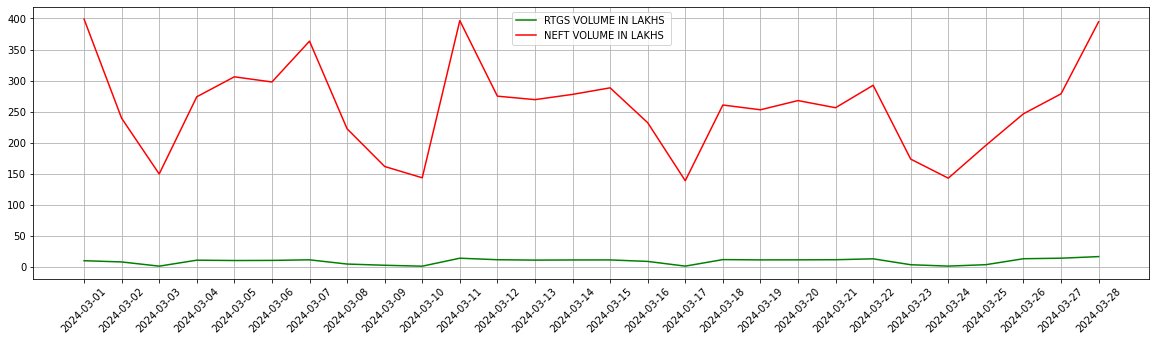

In [72]:
# RBI Regulated Payment system 
plt.figure(figsize=(20,5))
plt.plot(df_3["DATE"],df_3["RTGS VOL"],color = "green",label = "RTGS VOLUME IN LAKHS")
plt.plot(df_3["DATE"],df_3["NEFT VOL"],color = "red",label = "NEFT VOLUME IN LAKHS ")
plt.xticks(df_3["DATE"],rotation = 45)

plt.legend(loc =9)

plt.grid()
plt.show()

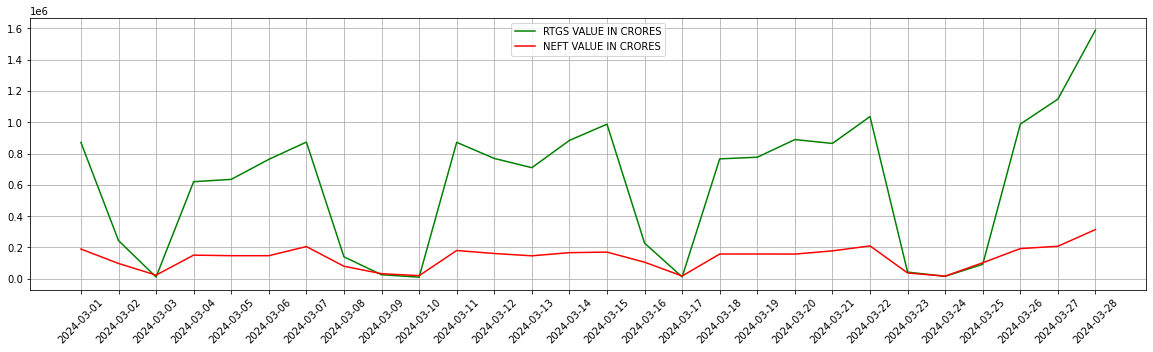

In [79]:
plt.figure(figsize=(20,5))
plt.plot(df_3["DATE"],df_3["RTGS VAL"],color = "green",label = "RTGS VALUE IN CRORES")
plt.plot(df_3["DATE"],df_3["NEFT VAL"],color = "red",label = "NEFT VALUE IN CRORES")
plt.xticks(df_3["DATE"],rotation = 45)
# plt.yticks(df_3["RTGS VAL"])

plt.legend(loc = 9)

plt.grid()
plt.show()

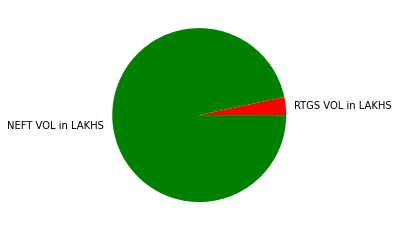

In [96]:
# Knowing the percentage of the VOL from RTGS and NEFT 
# and similarly for the VAL from NEFT and RTGS 

plt.pie([df_3["RTGS VOL"].sum(),df_3["NEFT VOL"].sum()],colors =['r','g'],
        labels = ["RTGS VOL in LAKHS","NEFT VOL in LAKHS"])

plt.show()

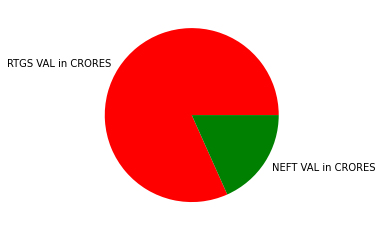

In [97]:
# Pie chart for percentage of the VALUE from RTGS and NEFT 
plt.pie([df_3["RTGS VAL"].sum(),df_3["NEFT VAL"].sum()],colors =['r','g'],
        labels = ["RTGS VAL in CRORES","NEFT VAL in CRORES"])
plt.show()

#### NPCI OPERATED PAYMENT SYSTEM 

##### AEPS NPCI OPERATED PAYMENT SYSTEM

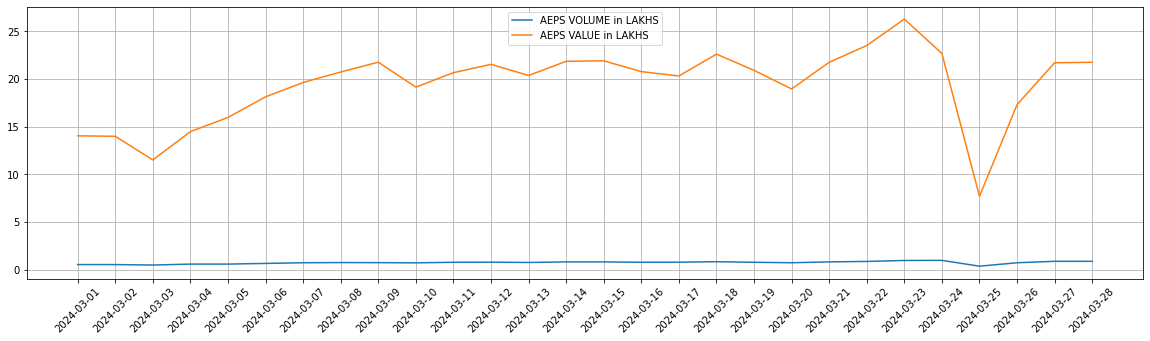

In [112]:
# Seeing the Payments trends for each type of system 
plt.figure(figsize = (20,5))
plt.plot(df_3["DATE"],df_3["AEPS VOL"],label = "AEPS VOLUME in LAKHS")
plt.plot(df_3["DATE"],df_3["AEPS VAL"],label = "AEPS VALUE in LAKHS")

plt.xticks(df_3["DATE"],rotation = 45)
plt.legend(loc =9)
plt.grid()

plt.show()


NOTE : 1 .show the above graphs in two different graphs using the subplot 
           2. think how the its changing over a period of day as it can be seen that its increasing on daily basis and that can be studied using this data. 

#### UPI NPCI OPERATED PAYMENT SYSTEM

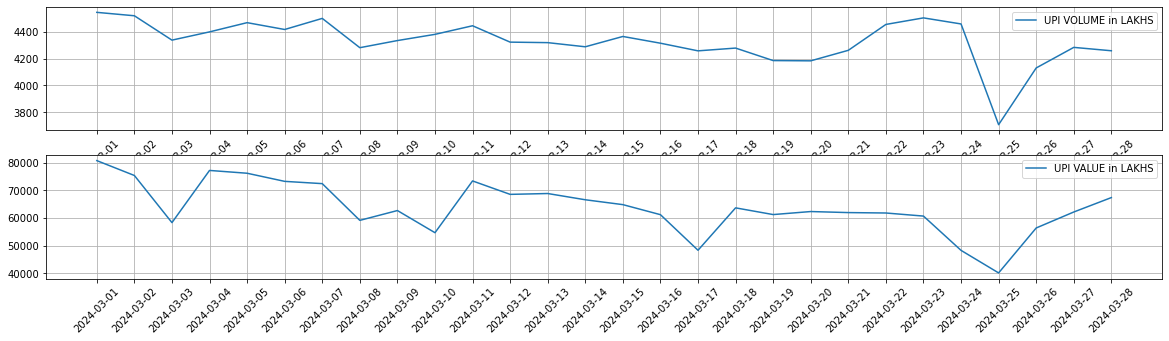

In [121]:
plt.figure(figsize = (20,5))

plt.subplot(2,1,1)
plt.plot(df_3["DATE"],df_3["UPI VOL"],label = "UPI VOLUME in LAKHS")
plt.xticks(df_3["DATE"],rotation = 45)
plt.grid()
plt.legend()

plt.subplot(2,1,2)
plt.plot(df_3["DATE"],df_3["UPI VAL"],label = "UPI VALUE in LAKHS")
plt.xticks(df_3["DATE"],rotation = 45)
plt.grid()
plt.legend()

plt.show()


#### IMPS NPCI OPERATED 

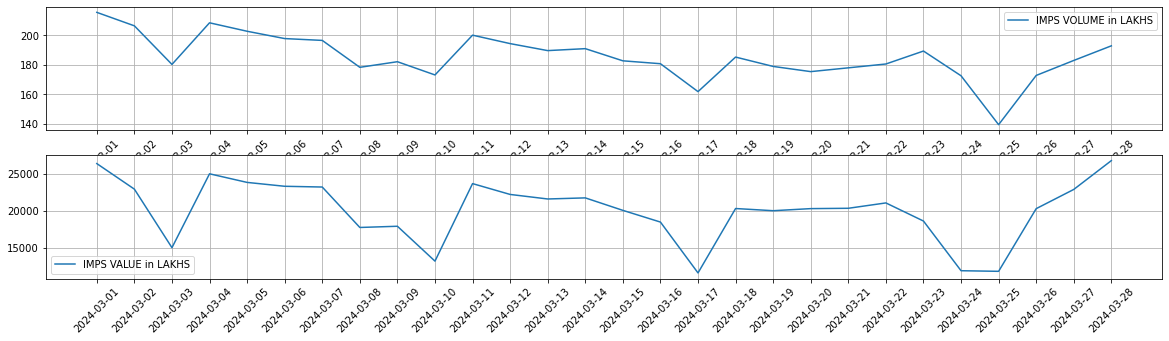

In [122]:
plt.figure(figsize = (20,5))

plt.subplot(2,1,1)
plt.plot(df_3["DATE"],df_3["IMPS VOL"],label = "IMPS VOLUME in LAKHS")
plt.xticks(df_3["DATE"],rotation = 45)
plt.grid()
plt.legend()

plt.subplot(2,1,2)
plt.plot(df_3["DATE"],df_3["IMPS VAL"],label = "IMPS VALUE in LAKHS")
plt.xticks(df_3["DATE"],rotation = 45)
plt.grid()
plt.legend()

plt.show()

#### NACH CREDIT NPCI OPERATED 

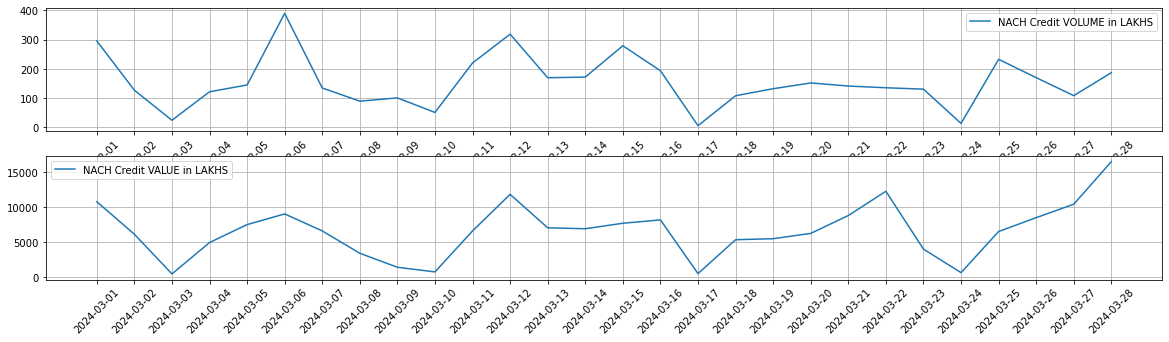

In [126]:
plt.figure(figsize = (20,5))

plt.subplot(2,1,1)
plt.plot(df_3["DATE"],df_3["NACH CREDIT VOL"],label = "NACH Credit VOLUME in LAKHS")
plt.xticks(df_3["DATE"],rotation = 45)
plt.grid()
plt.legend()

plt.subplot(2,1,2)
plt.plot(df_3["DATE"],df_3["NACH CREDIT VAL"],label = "NACH Credit VALUE in LAKHS")
plt.xticks(df_3["DATE"],rotation = 45)
plt.grid()
plt.legend()

plt.show()


#### NACH DEBIT NPCI OPERATED 

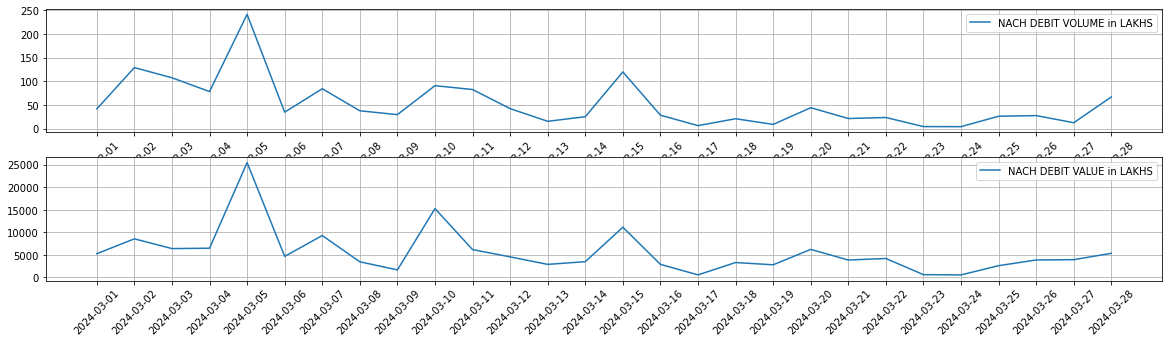

In [132]:
plt.figure(figsize = (20,5))

plt.subplot(2,1,1)
plt.plot(df_3["DATE"],df_3["NACH DEBIT VOL"],label = "NACH DEBIT VOLUME in LAKHS")
plt.xticks(df_3["DATE"],rotation = 45)
plt.grid()
plt.legend()

plt.subplot(2,1,2)
plt.plot(df_3["DATE"],df_3["NACH DEBIT VAL"],label = "NACH DEBIT VALUE in LAKHS")
plt.xticks(df_3["DATE"],rotation = 45)
plt.grid()
plt.legend()

plt.show()

#### NETC NPCI OPERATED

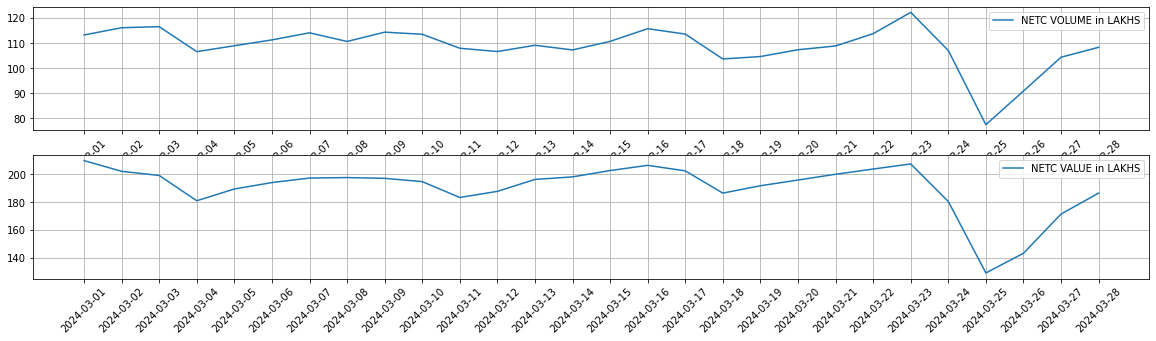

In [133]:
plt.figure(figsize = (20,5))

plt.subplot(2,1,1)
plt.plot(df_3["DATE"],df_3["NETC VOL"],label = "NETC VOLUME in LAKHS")
plt.xticks(df_3["DATE"],rotation = 45)
plt.grid()
plt.legend()

plt.subplot(2,1,2)
plt.plot(df_3["DATE"],df_3["NETC VAL"],label = "NETC VALUE in LAKHS")
plt.xticks(df_3["DATE"],rotation = 45)
plt.grid()
plt.legend()

plt.show()

#### BBPS NPCI OPERATED

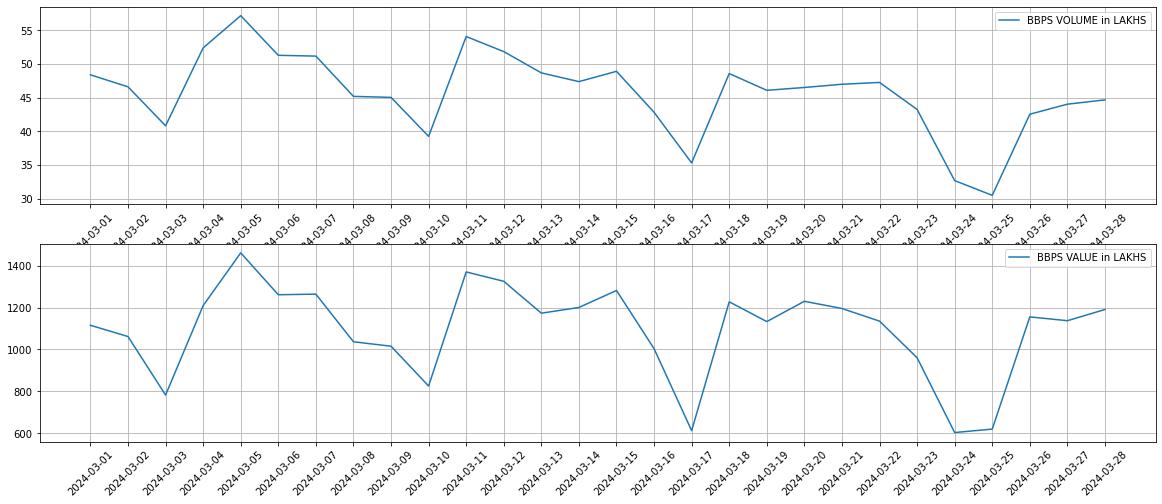

In [140]:
plt.figure(figsize = (20,8))

plt.subplot(2,1,1)
plt.plot(df_3["DATE"],df_3["BBPS VOL"],label = "BBPS VOLUME in LAKHS")
plt.xticks(df_3["DATE"],rotation = 45)
plt.grid()
plt.legend()

plt.subplot(2,1,2)
plt.plot(df_3["DATE"],df_3["BBPS VAL"],label = "BBPS VALUE in LAKHS")
plt.xticks(df_3["DATE"],rotation = 45)
plt.grid()
plt.legend()

plt.show()

### CTS NPCI OPERATED 

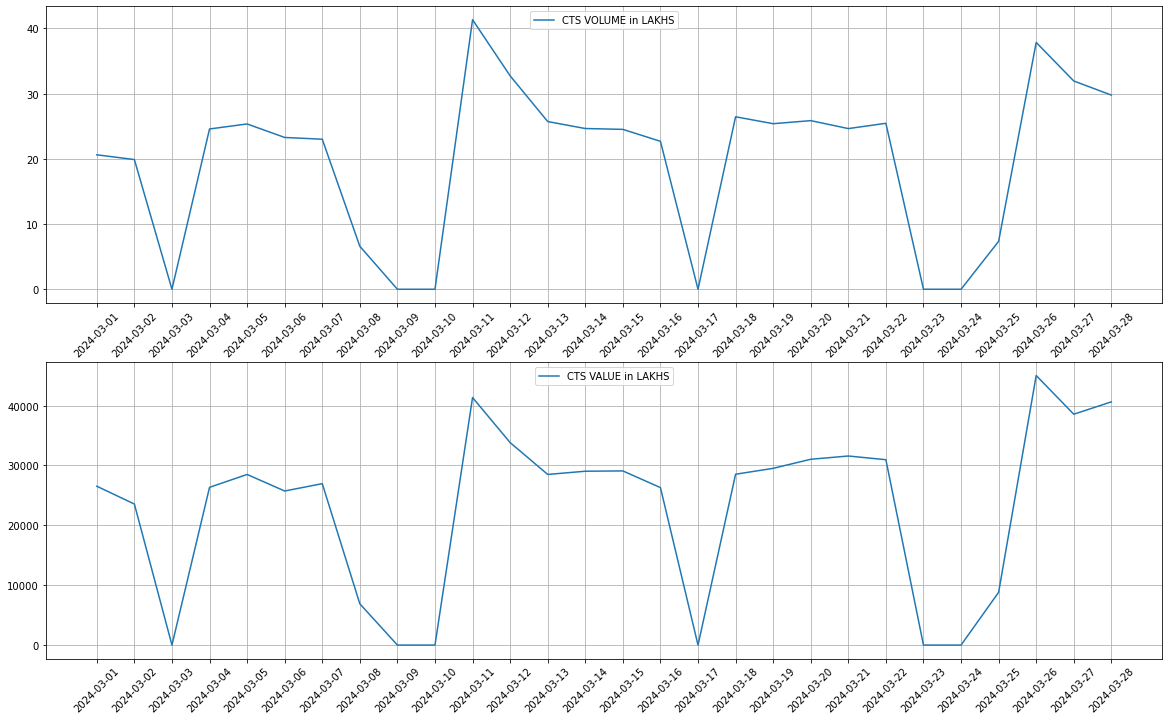

In [148]:
plt.figure(figsize = (20,12))

plt.subplot(2,1,1)
plt.plot(df_3["DATE"],df_3["CTS VOL"],label = "CTS VOLUME in LAKHS")
plt.xticks(df_3["DATE"],rotation = 45)
plt.grid()
plt.legend(loc = 9)

plt.subplot(2,1,2)
plt.plot(df_3["DATE"],df_3["CTS VAL"],label = "CTS VALUE in LAKHS")
plt.xticks(df_3["DATE"],rotation = 45)
plt.grid()
plt.legend(loc = 9)

plt.show()

#### Pie Chart

Here, we will see the contibution of each payment system in the NPCI network

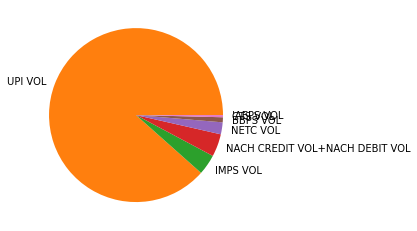

In [154]:
plt.pie([df_3["AEPS VOL"].sum(),df_3["UPI VOL"].sum(),
        df_3["IMPS VOL"].sum(),df_3["NACH CREDIT VOL"].sum()+df_3["NACH DEBIT VOL"].sum(),df_3["NETC VOL"].sum(),
        df_3["BBPS VOL"].sum(),df_3["CTS VOL"].sum()],
       labels = ["'AEPS VOL",'UPI VOL','IMPS VOL',
       'NACH CREDIT VOL+NACH DEBIT VOL','NETC VOL','BBPS VOL',
       'CTS VOL'])
plt.show()

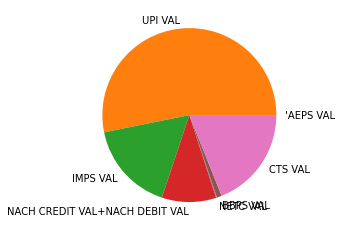

In [155]:
plt.pie([df_3["AEPS VAL"].sum(),df_3["UPI VAL"].sum(),
        df_3["IMPS VAL"].sum(),df_3["NACH CREDIT VAL"].sum()+df_3["NACH DEBIT VAL"].sum(),df_3["NETC VAL"].sum(),
        df_3["BBPS VAL"].sum(),df_3["CTS VAL"].sum()],
       labels = ["'AEPS VAL",'UPI VAL','IMPS VAL',
       'NACH CREDIT VAL+NACH DEBIT VAL','NETC VAL','BBPS VAL',
       'CTS VAL'])
plt.show()

In [173]:
%%timeit -n 10
df_3.columns

233 ns ± 170 ns per loop (mean ± std. dev. of 7 runs, 10 loops each)
